In [1]:
# Importera paket, skapa distributions, skapa träningsdata och dela ut labels
import torch
from torch.distributions.multivariate_normal import MultivariateNormal
import matplotlib.pyplot as plt
import numpy as np

distribution11 = MultivariateNormal(torch.tensor([4.,-1.]), torch.tensor([[1.,0],[0,2.]]))
distribution12 = MultivariateNormal(torch.tensor([0.,7.]), torch.tensor([[2.,0],[0,2.]]))
distribution13 = MultivariateNormal(torch.tensor([0.,15.]), torch.tensor([[2.,0],[0,6.]]))
distribution14 = MultivariateNormal(torch.tensor([-1.,-1.]), torch.tensor([[2.,0],[0,6.]]))

distribution21 = MultivariateNormal(torch.tensor([4.,5.]), torch.tensor([[1.,0],[0,1.]]))
distribution22 = MultivariateNormal(torch.tensor([3.,10.]), torch.tensor([[3.,0],[0,3.]]))
distribution23 = MultivariateNormal(torch.tensor([2.,1.]), torch.tensor([[2.,0],[0,3.]]))


number_of_samples=300

dataset11=torch.zeros(number_of_samples,3)
for i in range(0,number_of_samples):
    dataset11[i,0:2]=distribution11.sample()
dataset11[:,2]=0

dataset12=torch.zeros(number_of_samples,3)
for i in range(0,number_of_samples):
    dataset12[i,0:2]=distribution12.sample()
dataset12[:,2]=0

dataset13=torch.zeros(number_of_samples,3)
for i in range(0,number_of_samples):
    dataset13[i,0:2]=distribution13.sample()
dataset13[:,2]=0

dataset14=torch.zeros(number_of_samples,3)
for i in range(0,number_of_samples):
    dataset14[i,0:2]=distribution14.sample()
dataset14[:,2]=0

dataset_size=int(dataset11.size(0))
trainingset_percent=0.75
training_set_size=int(dataset11.size(0)*trainingset_percent)

trainingset1=torch.cat((dataset11[0:training_set_size],dataset12[0:training_set_size],\
                        dataset13[0:training_set_size],dataset14[0:training_set_size]),0)


dataset21=torch.zeros(number_of_samples,3)
for i in range(0,number_of_samples):
    dataset21[i,0:2]=distribution21.sample()
dataset21[:,2]=1

dataset22=torch.zeros(number_of_samples,3)
for i in range(0,number_of_samples):
    dataset22[i,0:2]=distribution22.sample()
dataset22[:,2]=1

dataset23=torch.zeros(number_of_samples,3)
for i in range(0,number_of_samples):
    dataset23[i,0:2]=distribution23.sample()
dataset23[:,2]=1

trainingset2=torch.cat((dataset21[0:training_set_size],dataset22[0:training_set_size],\
                        dataset23[0:training_set_size]),0)

trainingset=torch.cat((trainingset1,trainingset2),0)

testset1=torch.cat((dataset11[training_set_size:dataset_size],dataset12[training_set_size:dataset_size],\
                        dataset13[training_set_size:dataset_size],dataset14[training_set_size:dataset_size]),0)

testset2=torch.cat((dataset21[training_set_size:dataset_size],dataset22[training_set_size:dataset_size],\
                        dataset23[training_set_size:dataset_size]),0)

testset=torch.cat((testset1,testset2),0);

In [34]:
# Dela ut labels utifrån vilken label som har majoritet runt punkterna
correct_labels=testset[:,2].clone()
assigned_labels=torch.zeros(len(correct_labels))

distances=torch.cdist(testset[:,0:2],trainingset[:,0:2])
for k in range(1,57,5):
    for i in range(distances.size(0)):
        values_and_indices=distances[i,:].topk(k,largest=False)
        indices=values_and_indices[1]
        assigned_labels[i]=torch.round(sum(trainingset[indices,2])/k)
    
    correct_classifications=0
    for i in range(correct_labels.size(0)):
        if assigned_labels[i]==correct_labels[i]:
            correct_classifications=correct_classifications+1
    Accuracy=correct_classifications/correct_labels.size(0)

    print("k=",k,"Accuracy=",round(Accuracy,4))

k= 1 Accuracy= 0.8248
k= 6 Accuracy= 0.8648
k= 11 Accuracy= 0.8686
k= 16 Accuracy= 0.8705
k= 21 Accuracy= 0.88
k= 26 Accuracy= 0.8819
k= 31 Accuracy= 0.8857
k= 36 Accuracy= 0.8819
k= 41 Accuracy= 0.8819
k= 46 Accuracy= 0.88
k= 51 Accuracy= 0.8876
k= 56 Accuracy= 0.8781


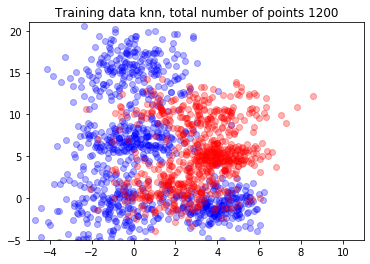

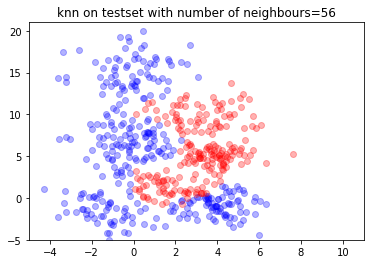

In [35]:
# Sortera datapunkter efter vilken label de fått och plotta
j=0
m=0
label0=torch.zeros(testset.size(0),2)
label1=torch.zeros(testset.size(0),2)

for i in range(distances.size(0)):
    if assigned_labels[i]==0:
        label0[j]=testset[i,0:2]
        j=j+1
    else:
        label1[m]=testset[i,0:2]
        m=m+1
label0 = label0[~torch.all(label0 == 0, axis=1)]
label1 = label1[~torch.all(label1 == 0, axis=1)]


opacity=0.3
fig, plt1 = plt.subplots(1)

plt1.set_title('Training data knn, total number of points 900')

x1=trainingset1[:,0]
y1=trainingset1[:,1]

x2=trainingset2[:,0]
y2=trainingset2[:,1]

plt1.plot(x1.numpy(), y1.numpy(),"ob",alpha=opacity)
plt1.plot(x2.numpy(), y2.numpy(),"or",alpha=opacity)

plt1.axis([-5, 11, -5, 21])


fig, plt2 = plt.subplots(1)

plt2.set_title('knn on testset with number of neighbours=%i' % k)

x3=label0[:,0]
y3=label0[:,1]

x4=label1[:,0]
y4=label1[:,1]

plt2.plot(x3.numpy(), y3.numpy(),"ob",alpha=opacity)
plt2.plot(x4.numpy(), y4.numpy(),"or",alpha=opacity)

plt2.axis([-5, 11, -5, 21]);

In [46]:
# Create a mislabeled training set
number_of_elements=trainingset.size(0)
mislabeled_set=trainingset.clone()
percent_mislabeling=0.05
for i in range(0,number_of_elements,int(1/percent_mislabeling)):
    mislabeled_set[i,2]=trainingset[i,2]+1-trainingset[i,2]*2


In [49]:
# Calculate accuracy of kNN trained on mislabeled training set, print for different number of neighbours
correct_labels=testset[:,2].clone()
assigned_labels_ml=torch.zeros(len(correct_labels))

distances=torch.cdist(testset[:,0:2],trainingset[:,0:2])
for k in range(1,57,5):
    for i in range(distances.size(0)):
        values_and_indices=distances[i,:].topk(k,largest=False)
        indices=values_and_indices[1]
        assigned_labels_ml[i]=torch.round(sum(mislabeled_set[indices,2])/k)
    
    correct_classifications=0
    for i in range(correct_labels.size(0)):
        if assigned_labels_ml[i]==correct_labels[i]:
            correct_classifications=correct_classifications+1
    Accuracy=correct_classifications/correct_labels.size(0)

    print("k=",k,"Accuracy=",round(Accuracy,4))
    

k= 1 Accuracy= 0.7962
k= 6 Accuracy= 0.8533
k= 11 Accuracy= 0.8667
k= 16 Accuracy= 0.8781
k= 21 Accuracy= 0.88
k= 26 Accuracy= 0.8743
k= 31 Accuracy= 0.88
k= 36 Accuracy= 0.8781
k= 41 Accuracy= 0.8819
k= 46 Accuracy= 0.8876
k= 51 Accuracy= 0.8838
k= 56 Accuracy= 0.8781


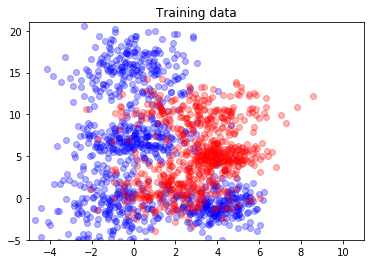

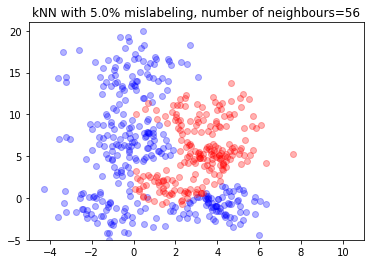

In [50]:
# Put classified data in lists and plot them
j=0
m=0
label0=torch.zeros(testset.size(0),2)
label1=torch.zeros(testset.size(0),2)

for i in range(distances.size(0)):
    if assigned_labels_ml[i]==0:
        label0[j]=testset[i,0:2]
        j=j+1
    else:
        label1[m]=testset[i,0:2]
        m=m+1
label0 = label0[~torch.all(label0 == 0, axis=1)]
label1 = label1[~torch.all(label1 == 0, axis=1)]


opacity=0.3
fig, plt1 = plt.subplots(1)

plt1.set_title('Training data')

x1=trainingset1[:,0]
y1=trainingset1[:,1]

x2=trainingset2[:,0]
y2=trainingset2[:,1]

plt1.plot(x1.numpy(), y1.numpy(),"ob",alpha=opacity)
plt1.plot(x2.numpy(), y2.numpy(),"or",alpha=opacity)

plt1.axis([-5, 11, -5, 21])


fig, plt2 = plt.subplots(1)

plt2.set_title('kNN with '+str(percent_mislabeling*100)+'% mislabeling, number of neighbours='+str(k))

x3=label0[:,0]
y3=label0[:,1]

x4=label1[:,0]
y4=label1[:,1]

plt2.plot(x3.numpy(), y3.numpy(),"ob",alpha=opacity)
plt2.plot(x4.numpy(), y4.numpy(),"or",alpha=opacity)

plt2.axis([-5, 11, -5, 21]);

In [9]:
# Create trainingset and testset
dataset_size=int(dataset11.size(0))
trainingset_percent=0.75
training_set_size=int(dataset11.size(0)*trainingset_percent)

trainingset1=torch.cat((dataset11[0:training_set_size],dataset12[0:training_set_size],\
                        dataset13[0:training_set_size],dataset14[0:training_set_size]),0)

trainingset2=torch.cat((dataset21[0:training_set_size],dataset22[0:training_set_size],\
                        dataset23[0:training_set_size]),0)

trainingset=torch.cat((trainingset1,trainingset2),0)

testset1=torch.cat((dataset11[training_set_size:dataset_size],dataset12[training_set_size:dataset_size],\
                        dataset13[training_set_size:dataset_size],dataset14[training_set_size:dataset_size]),0)

testset2=torch.cat((dataset21[training_set_size:dataset_size],dataset22[training_set_size:dataset_size],\
                        dataset23[training_set_size:dataset_size]),0)

testset=torch.cat((testset1,testset2),0);

In [10]:
# Calculate beta and test accuracy
testset_size=testset.size(0)

xtrans=torch.t(trainingset[:,0:2])
xtxinv=torch.inverse(torch.matmul(xtrans,trainingset[:,0:2]))
xtxinv_and_xtrans=torch.matmul(xtxinv,xtrans)
beta=torch.t(torch.matmul(xtxinv_and_xtrans,trainingset[:,2]))
classifications=torch.zeros(testset_size)
for i in range(testset_size):
    classifications[i]=torch.matmul(testset[i,0:2],beta)

number_of_correct=0
for i in range(testset_size):
    if torch.round(classifications[i])==testset[i,2]:
        number_of_correct=number_of_correct+1


print('Accuracy={:.1f}'.format(100*number_of_correct/testset_size)+'%')


Accuracy=72.6%


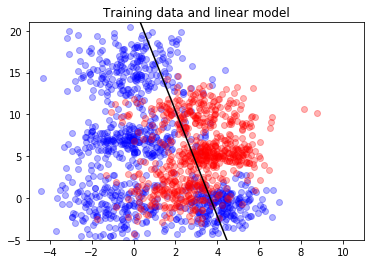

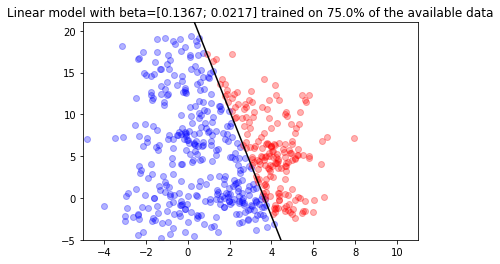

In [11]:
# Plot linear model
j=0
m=0
label0=torch.zeros(testset_size,2)
label1=torch.zeros(testset_size,2)

for i in range(testset_size):
    if classifications[i]<0.5:
        label0[j]=testset[i,0:2]
        j=j+1
    else:
        label1[m]=testset[i,0:2]
        m=m+1
label0 = label0[~torch.all(label0 == 0, axis=1)]
label1 = label1[~torch.all(label1 == 0, axis=1)]


x = np.linspace(-5,6,100)
y = 0.5/float(beta[1])-x*float(beta[0])/float(beta[1])

fig, plt1 = plt.subplots(1)

plt1.set_title('Training data and linear model')

x1=trainingset1[:,0]
y1=trainingset1[:,1]

x2=trainingset2[:,0]
y2=trainingset2[:,1]

plt1.plot(x1.numpy(), y1.numpy(),"ob",alpha=opacity)
plt1.plot(x2.numpy(), y2.numpy(),"or",alpha=opacity)

plt.plot(x, y, '-k')

plt1.axis([-5, 11, -5, 21])

fig, plt2 = plt.subplots(1)

plt2.set_title("Linear model with beta=[{:.4f}; {:.4f}]".format(beta[0],beta[1])+' trained on {:.1f}'\
               .format(trainingset_percent*100)+'% of the available data')

x3=label0[:,0]
y3=label0[:,1]

x4=label1[:,0]
y4=label1[:,1]

plt2.plot(x3.numpy(), y3.numpy(),"ob",alpha=opacity)
plt2.plot(x4.numpy(), y4.numpy(),"or",alpha=opacity)


plt.plot(x, y, '-k')

plt2.axis([-5, 11, -5, 21]);

In [12]:
# Create a mislabeled training set
number_of_elements=trainingset.size(0)
mislabeled_set=trainingset.clone()
percent_mislabeling=0.05
for i in range(0,number_of_elements,int(1/percent_mislabeling)):
    mislabeled_set[i,2]=trainingset[i,2]+1-trainingset[i,2]*2

In [13]:
# Calculate beta and test accuracy
testset_size=testset.size(0)

xtrans=torch.t(mislabeled_set[:,0:2])
xtxinv=torch.inverse(torch.matmul(xtrans,mislabeled_set[:,0:2]))
xtxinv_and_xtrans=torch.matmul(xtxinv,xtrans)
beta=torch.t(torch.matmul(xtxinv_and_xtrans,mislabeled_set[:,2]))
classifications=torch.zeros(testset_size)
for i in range(testset_size):
    classifications[i]=torch.matmul(testset[i,0:2],beta)

number_of_correct=0
for i in range(testset_size):
    if torch.round(classifications[i])==testset[i,2]:
        number_of_correct=number_of_correct+1


print('Accuracy={:.1f}'.format(100*number_of_correct/testset_size)+'%')


Accuracy=71.4%


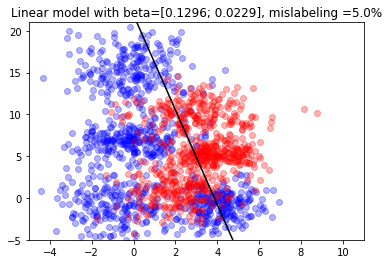

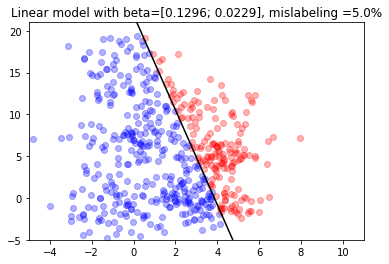

In [14]:
# Plot linear model
j=0
m=0
label0=torch.zeros(testset_size,2)
label1=torch.zeros(testset_size,2)

for i in range(testset_size):
    if classifications[i]<0.5:
        label0[j]=testset[i,0:2]
        j=j+1
    else:
        label1[m]=testset[i,0:2]
        m=m+1
label0 = label0[~torch.all(label0 == 0, axis=1)]
label1 = label1[~torch.all(label1 == 0, axis=1)]


x = np.linspace(-5,11,100)
y = 0.5/float(beta[1])-x*float(beta[0])/float(beta[1])

fig, plt1 = plt.subplots(1)

plt1.set_title("Linear model with beta=[{:.4f}; {:.4f}]".format(beta[0],beta[1])+', mislabeling ={:.1f}'\
               .format(percent_mislabeling*100)+'%')

x1=trainingset1[:,0]
y1=trainingset1[:,1]

x2=trainingset2[:,0]
y2=trainingset2[:,1]

plt1.plot(x1.numpy(), y1.numpy(),"ob",alpha=opacity)
plt1.plot(x2.numpy(), y2.numpy(),"or",alpha=opacity)

plt.plot(x, y, '-k')

plt1.axis([-5, 11, -5, 21])

fig, plt2 = plt.subplots(1)

plt2.set_title("Linear model with beta=[{:.4f}; {:.4f}]".format(beta[0],beta[1])+', mislabeling ={:.1f}'\
               .format(percent_mislabeling*100)+'%')

x3=label0[:,0]
y3=label0[:,1]

x4=label1[:,0]
y4=label1[:,1]

plt2.plot(x3.numpy(), y3.numpy(),"ob",alpha=opacity)
plt2.plot(x4.numpy(), y4.numpy(),"or",alpha=opacity)


plt.plot(x, y, '-k')

plt2.axis([-5, 11, -5, 21]);

In [15]:
torch.zeros(5,2)

tensor([[0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.]])

In [16]:

for i in range(0,10,1):
    print(i)


0
1
2
3
4
5
6
7
8
9
